# Библиотеки Python для DS (семинары)

Урок 5. Использование алгоритмов оптимизации для улучшения качества модели.

1. Определение скорости обучения
Используйте Cancer_Data для классификации. Обучите модель логистической регрессии с разными значениями скорости обучения (с разными значениями параметра C, который является обратным значением скорости обучения).
Запишите и сравните результаты метрик качества и скорости сходимости модели.

2. Познакомиться с работой стохастического градиентного спуска.
Используйте набор данных для обучения модели с использованием стохастического градиентного спуска (SGD). Сравните скорость сходимости и итоговое качество модели со стандартным градиентным спуском.

3. Сравнить разные алгоритмы оптимизации.

— На исходном наборе данных обучить модель логистической регрессии, используя разные оптимизаторы, и сравнить их эффективность.


## Выполнение домашней работы

##### Используя diabetes-dataset

In [123]:
# Библиотеки для скачивания датасета
from pathlib import Path
import opendatasets as od

In [124]:
# Скачиваем датасет
dataset_path = Path('erdemtaha/cancer-data')
# Проверяем существование директории с датасетом
if not dataset_path.is_file():
    od.download('https://www.kaggle.com/datasets/erdemtaha/cancer-data')

Skipping, found downloaded files in ".\cancer-data" (use force=True to force download)


In [125]:
# Библиотеки для работы с датасетом и графиками
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import SGDClassifier

In [126]:
# Загружаем датасет
df = pd.read_csv('cancer-data/Cancer_Data.csv')

##### 1. Определение скорости обучения
— Используйте Cancer_Data для классификации. 

— Обучите модель логистической регрессии с разными значениями скорости обучения (с разными значениями параметра C, который является обратным значением скорости обучения).

— Запишите и сравните результаты метрик качества и скорости сходимости модели.

In [127]:
# Выводим дата фрейм
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Этот фрейм данных содержит следующие столбцы:

1. id: Represents a unique ID of each patient — (представляет уникальный идентификатор каждого пациента.
diagnose: указывает тип рака)
2. diagnosis: Indicates the type of cancer. This property can take the values "M" (Malignant - Benign) or "B" (Benign - Malignant) — (Это свойство может принимать значения «M» (злокачественный — доброкачественный) или «B» (доброкачественный — злокачественный))
3. radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean: Represents the mean values of the cancer's visual characteristics.(представляет средние значения визуальных характеристик рака.)

In [128]:
# Смотрим количество пропущеных значений.
print("Количество пропущенных значений:")
print(df.isnull().sum())

Количество пропущенных значений:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fracta

In [129]:
# Удаляем колонку с нулевыми значениями.
df_cancer = df.drop('Unnamed: 32', axis=1)

In [130]:
# Смотрим тип данных
df_cancer.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [131]:
# Выводим общую информацию
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Из общей информации следует:
1. DataFrame содержит 569 записей (от индекса 0 до 568).
2. Всего 32 колоноки
3. Нулевые значения в колонке Unnamed: 32, которая была удалена.
4. Нет пропущеных записей в колонках
5. Все колонки в float64 кроме diagnosis которая содержит object и колонки id в которой хранится int64

In [132]:
# Статистический анализ числовых переменных
df_cancer.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


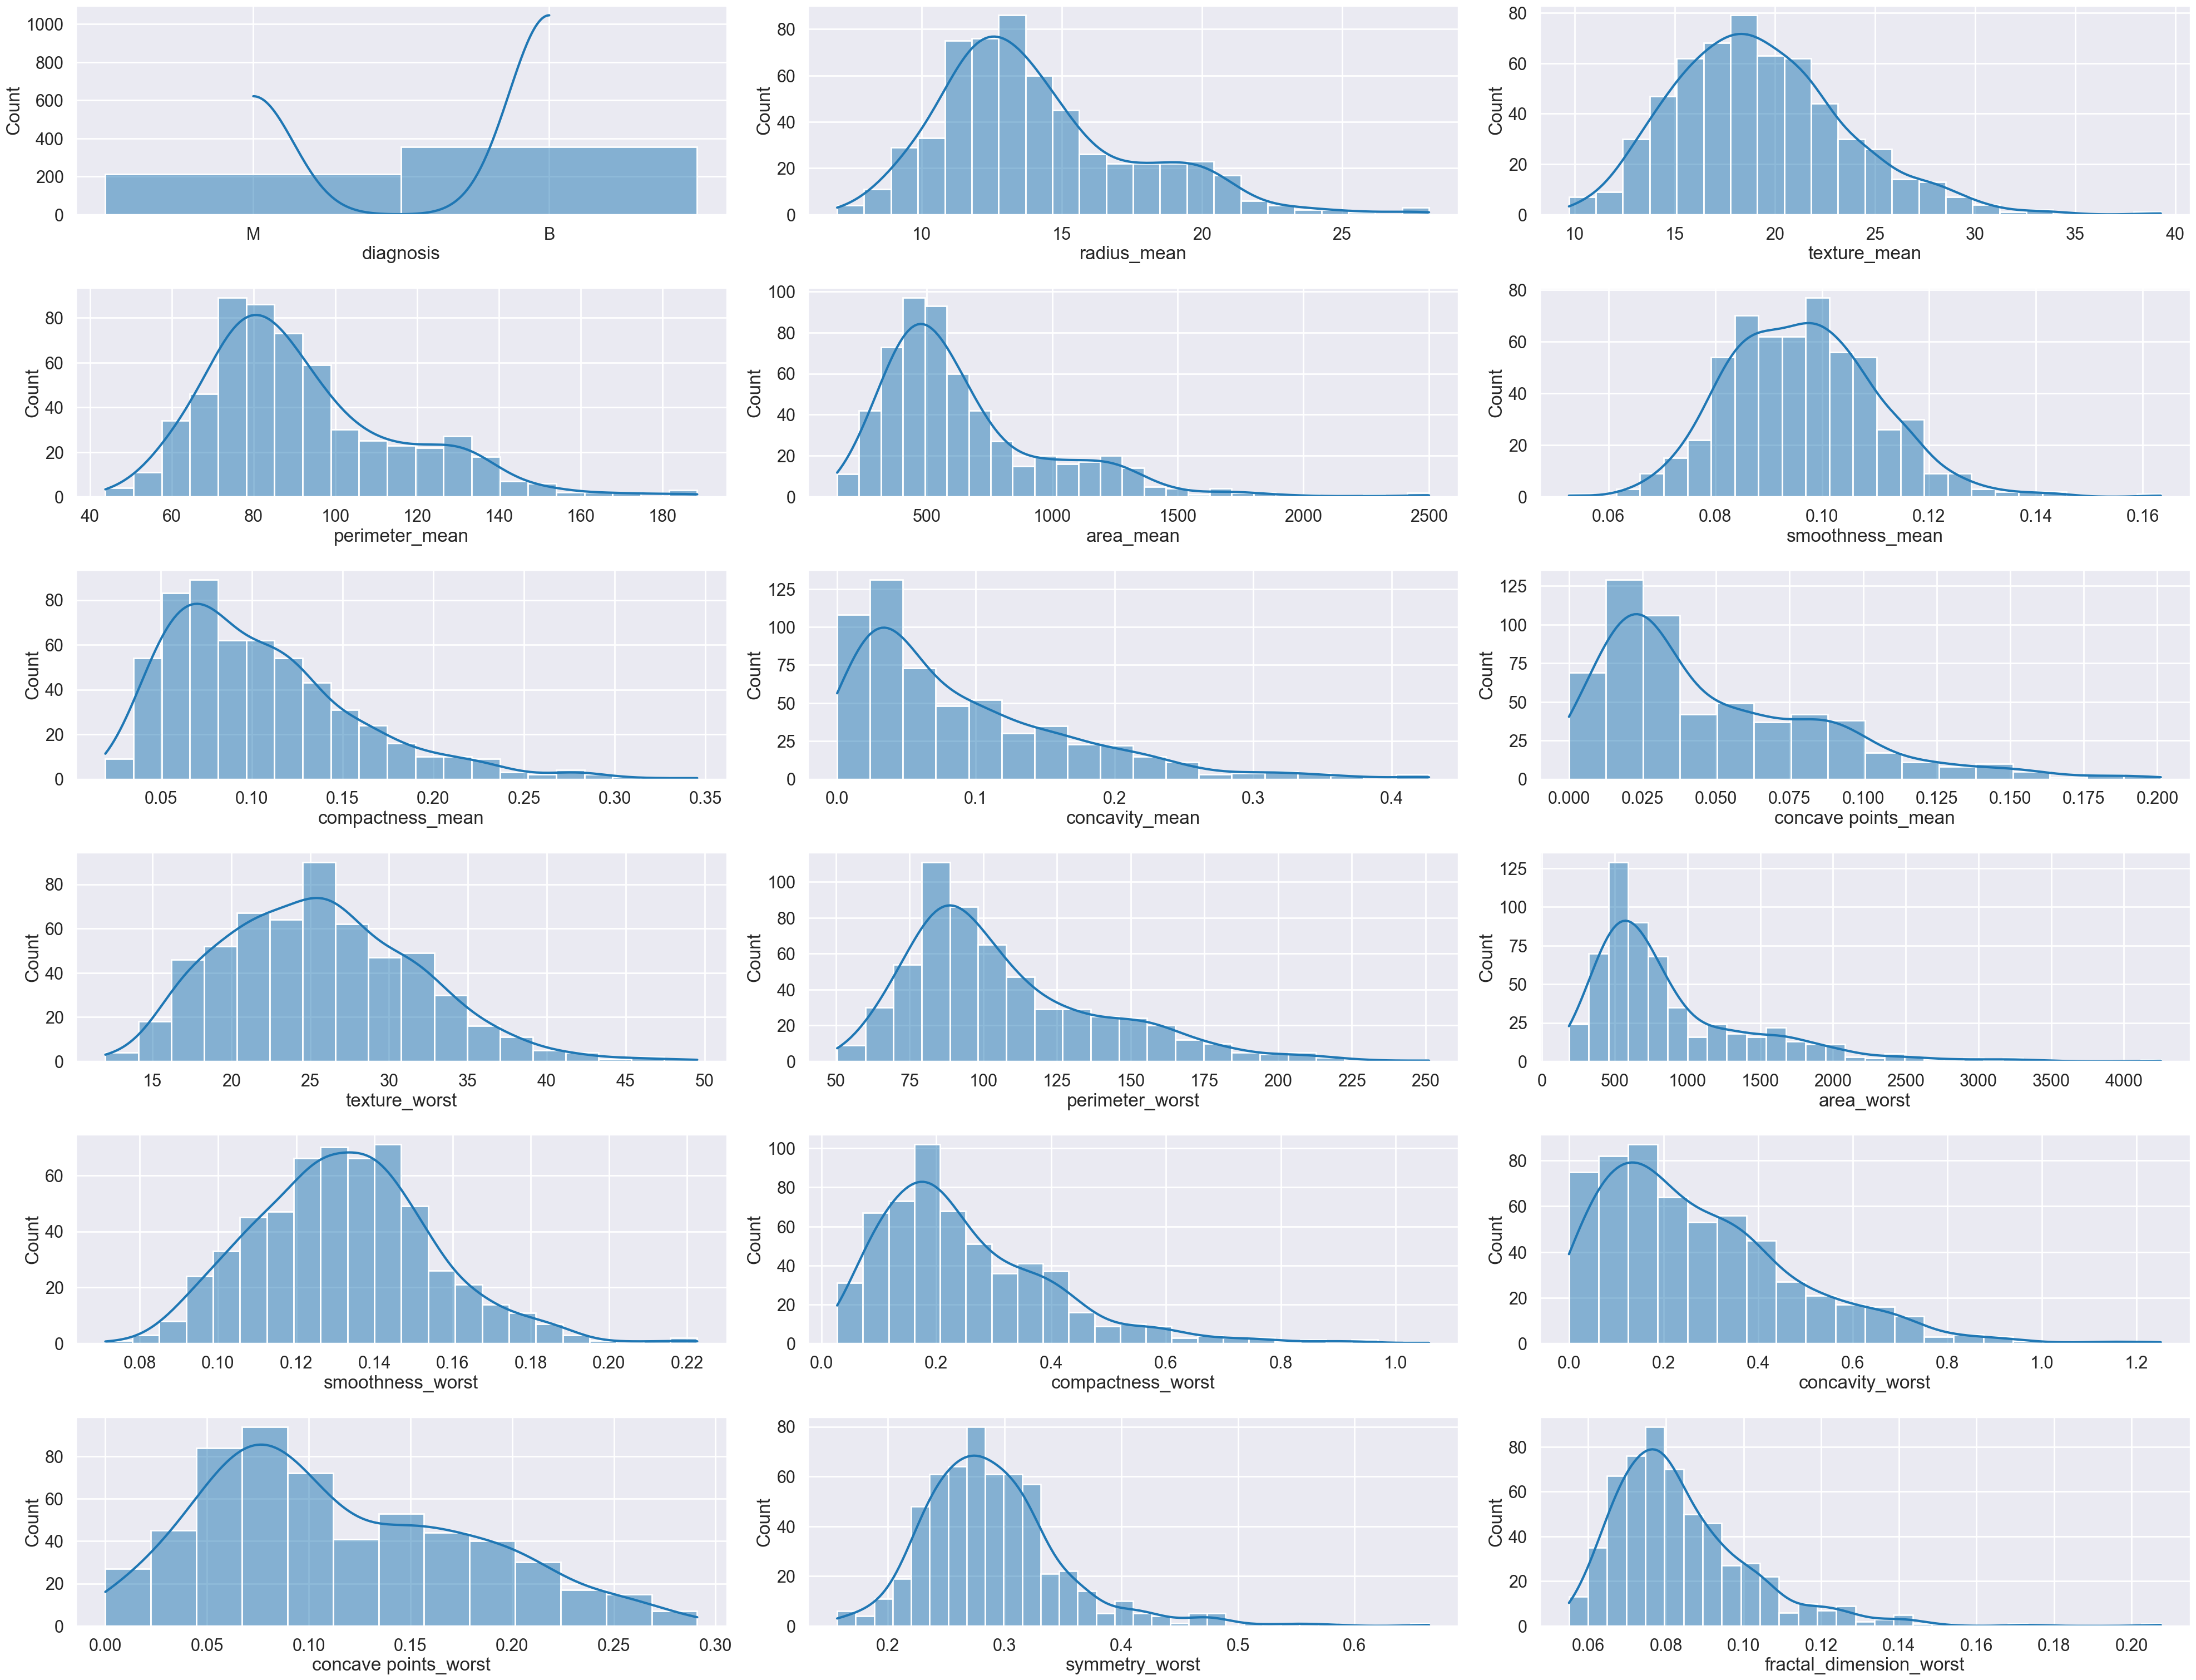

In [133]:
# Визуализация гистограмм
plt.figure(figsize=(40, 40))
for i, column in enumerate(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
                            	'area_mean', 'smoothness_mean', 'compactness_mean',	'concavity_mean',
                                'concave points_mean', 'texture_worst',	'perimeter_worst',	'area_worst',
                            	'smoothness_worst',	'compactness_worst', 'concavity_worst', 'concave points_worst',
                            	'symmetry_worst',	'fractal_dimension_worst'], 1):
    plt.subplot(8, 3, i)
    sns.histplot(df[column], kde=True)

plt.tight_layout()
plt.show()

In [134]:
# Подготавливаем столбец diagnosis перед обученим модели
# Приводим обектные значения к интовым
mapDiag = {'B': 0, 'M': 1}
df_cancer['diagnosis'] = df_cancer['diagnosis'].map(mapDiag)

In [135]:
# Проверяем тип чтобы удостовериться, что изменения прошли успешно
df_cancer.dtypes['diagnosis']

dtype('int64')

```
# Извлечём признаки
features = list(df_cancer[2:32])

# Создадим отдельный df с признаками 
df_features = df_cancer[features]

# Определим целевую переменную
target = df_cancer['diagnosis'] 
```
Решил попробовать другой способ разделения признаков в итоге, с данным разделением получаются идеальные метрики Accuracy, Precision, Recall, F1,
по-этому решил вернуться к классическому способу показаному на семинаре.

In [136]:
# Извлечём diagnosis из признаков
X = df_cancer.drop('diagnosis', axis=1)
# Определим целевую переменную
y = df_cancer['diagnosis']

In [137]:
# Определяем переменные для обучения
#X = df_features
#y = target

# Маштабируем признаки
X_scaled = StandardScaler().fit_transform(X)
# Разделяем данные на обучающий и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, random_state = 42)

# Выводим размеры
print("Размер обучающего набора:", X_train.shape)
print("Размер тестового набора:", X_test.shape)

Размер обучающего набора: (455, 31)
Размер тестового набора: (114, 31)


In [138]:
# Разные значения C (обратные значения скорости обучения)
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
results = []

for C in C_values:
    # Создание и обучение модели
    model = LogisticRegression(C=C, solver='liblinear', max_iter=1000)
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    # Предсказание на тестовой выборке
    y_pred = model.predict(X_test)
    
    # Оценка качества модели
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append((C, accuracy, precision, recall, f1, training_time))

In [139]:
# Вывод результатов
for result in results:
    print(f'C: {result[0]}, \
        \n Accuracy: {result[1]}, \
        \n Precision: {result[2]}, \
        \n Recall: {result[3]}, \
        \n F1 Score: {result[4]}, \
        \n Training Time: {result[5]:.4f} sec')

C: 0.001,         
 Accuracy: 0.9649122807017544,         
 Precision: 0.9534883720930233,         
 Recall: 0.9534883720930233,         
 F1 Score: 0.9534883720930233,         
 Training Time: 0.0040 sec
C: 0.01,         
 Accuracy: 0.9824561403508771,         
 Precision: 0.9767441860465116,         
 Recall: 0.9767441860465116,         
 F1 Score: 0.9767441860465116,         
 Training Time: 0.0040 sec
C: 0.1,         
 Accuracy: 0.9912280701754386,         
 Precision: 1.0,         
 Recall: 0.9767441860465116,         
 F1 Score: 0.9882352941176471,         
 Training Time: 0.0040 sec
C: 1,         
 Accuracy: 0.9736842105263158,         
 Precision: 0.9761904761904762,         
 Recall: 0.9534883720930233,         
 F1 Score: 0.9647058823529412,         
 Training Time: 0.0040 sec
C: 10,         
 Accuracy: 0.9736842105263158,         
 Precision: 0.9545454545454546,         
 Recall: 0.9767441860465116,         
 F1 Score: 0.9655172413793104,         
 Training Time: 0.0040 sec


C: 0.001,         
 Accuracy: 0.9649122807017544,         
 Precision: 0.9534883720930233,         
 Recall: 0.9534883720930233,         
 F1 Score: 0.9534883720930233,         
 Training Time: 0.004466533660888672 sec

Модель показывает хорошую производительность. 

C: 0.01,         
 Accuracy: 0.9824561403508771,         
 Precision: 0.9767441860465116,         
 Recall: 0.9767441860465116,         
 F1 Score: 0.9767441860465116,         
 Training Time: 0.003995656967163086 sec

Значительное улучшение по всем метрикам.

C: 0.1,         
 Accuracy: 0.9912280701754386,         
 Precision: 1.0,         
 Recall: 0.9767441860465116,         
 F1 Score: 0.9882352941176471,         
 Training Time: 0.004979372024536133 sec

Наилучшие результаты по точности и F1 Score.

C: 1,         
 Accuracy: 0.9736842105263158,         
 Precision: 0.9761904761904762,         
 Recall: 0.9534883720930233,         
 F1 Score: 0.9647058823529412,         
 Training Time: 0.006993770599365234 sec

Небольшое снижение производительности по сравнению с C = 0.1

C: 10,         
 Accuracy: 0.9736842105263158,         
 Precision: 0.9545454545454546,         
 Recall: 0.9767441860465116,         
 F1 Score: 0.9655172413793104,         
 Training Time: 0.00799417495727539 sec

Снижение точности, хотя Recall остается высоким.

C: 100,         
 Accuracy: 0.9385964912280702,         
 Precision: 0.875,         
 Recall: 0.9767441860465116,         
 F1 Score: 0.9230769230769231,         
 Training Time: 0.006000041961669922 sec

Значительное снижение всех метрик, что возможно указывает на сильное переобучение.

Тенденция к улучшению метрик с увеличением C до 0.1:
При увеличении C от 0.001 до 0.1 наблюдается общее улучшение метрик (Accuracy, Precision, Recall, F1 Score). Это указывает на то, что модель лучше справляется с классификацией, когда значение C увеличивается до определенного уровня.

Пик производительности при C = 0.1:
На C = 0.1 метрики достигают высоких значений, особенно Precision, который равен 1.0. Это означает, что модель не делает ложных положительных предсказаний, что является хорошим знаком для задач, где важна точность предсказаний.

Снижение производительности при больших значениях C (10 и 100):
При C = 10 и C = 100 наблюдается снижение метрик по сравнению с C = 0.1. Это может указывать на то, что модель начинает переобучаться, когда значение C становится слишком большим, что приводит к ухудшению обобщающей способности модели.


##### 2. Познакомиться с работой стохастического градиентного спуска.
— Используйте набор данных для обучения модели с использованием стохастического градиентного спуска (SGD). 

— Сравните скорость сходимости и итоговое качество модели со стандартным градиентным спуском.

In [149]:
# Создание и обучение модели с использованием стандартного градиентного спуска
start_time = time.time()
model_lr = LogisticRegression(class_weight='balanced')
model_lr.fit(X_train, y_train)
training_time_lr = time.time() - start_time

# Предсказание на тестовой выборке
predictions_lr = model_lr.predict(X_test)

# Оценка производительности модели
accuracy_lr = accuracy_score(y_test, predictions_lr)
print("Accuracy LogisticRegretion:", accuracy_lr)

Accuracy LogisticRegretion: 0.9824561403508771


In [150]:
# Создание и обучение модели с использованием стохастического градиентного спука (SGD)
start_time = time.time()
model_sgd = SGDClassifier(class_weight='balanced')
model_sgd.fit(X_train, y_train)
training_time_sgd = time.time() - start_time

# Предсказание на тестовой выборке
predictions_sgd = model_sgd.predict(X_test)

# Оценка производительности модели
accuracy_sgd = accuracy_score(y_test, predictions_sgd)
print("Accuracy SGDClassifier:", accuracy_sgd)

Accuracy SGDClassifier: 0.9649122807017544


In [151]:
print(f'Logistic Regression: \
        \n Accuracy: {accuracy_lr} \
        \n Training Time: {training_time_lr:.4f} sec')
print(f'SGDClassifier: \
        \n Accuracy: {accuracy_sgd} \
        \n Training Time: {training_time_sgd:.4f} sec')

Logistic Regression:         
 Accuracy: 0.9824561403508771         
 Training Time: 0.0310 sec
SGDClassifier:         
 Accuracy: 0.9649122807017544         
 Training Time: 0.0060 sec


Модель логистической регрессии показала более высокую точность по сравнению с SGD-классификатором, но SGD-классификатор значительно быстрее обучается, чем логистическая регрессия.

##### 3. Сравнить разные алгоритмы оптимизации.

— На исходном наборе данных обучить модель логистической регрессии, используя разные оптимизаторы, и сравнить их эффективность.